In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib as plt

In [2]:
with open('/mnt/dzl_bioinf/binliu/jupyter/important_supportive_files/platform_annotation.json') as json_file:
    data = json.load(json_file)


In [3]:
data.keys()

dict_keys(['gene_to_id_relationship', 'gene_to_index_relationship', 'id_to_gene_relationship', 'index_to_gene_relationship'])

In [4]:
len(data['gene_to_index_relationship'].keys())

24442

In [5]:
gene_map = data['gene_to_index_relationship']
trimmed_gene_map = {}
reversed_gene_map = {}

In [6]:
for key in gene_map:
    if str(gene_map[key]) not in reversed_gene_map:
        trimmed_gene_map[key] = gene_map[key]
        reversed_gene_map[str(gene_map[key])] = key
    

In [7]:
len(trimmed_gene_map.keys())

23375

In [8]:
list(trimmed_gene_map.keys())[0:5]

['DDR1', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A']

RMA is the log2 sensitivity

In [9]:
def transcriptsToGenes(df, indexJson):
    newDf = []
    df_trans = df.apply(lambda x: np.exp2(x)
        if np.issubdtype(x.dtype, np.number) else x)
    for key in indexJson.keys():
        indexNr = indexJson[key]
        df_tem = df_trans.iloc[:, indexNr]
        log_tem = df_tem.mean(axis = 1) 
        newDf.append(np.log2(log_tem))
    newDf = np.array(newDf)  
    print(newDf.shape)
    newDf = np.array(newDf.transpose())  
    return newDf


In [10]:
X_train_original = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/jupyter/newTrial_June/Training_set_lung_related_comparison_filtered_characteristics_without_zscore.csv", index_col=0)
X_test_original = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/jupyter/newTrial_June/Testing_set_lung_related_comparison_filtered_characteristics_without_zscore.csv", index_col=0)


In [11]:
X_train_original.index[0:5]

Index(['Sample 18233', 'Sample 13285', 'Sample 8106', 'Sample 6234',
       'Sample 19793'],
      dtype='object')

In [12]:
X_train_original.shape

(969, 54675)

In [13]:
X_train_trans = transcriptsToGenes(X_train_original, trimmed_gene_map)
X_test_trans = transcriptsToGenes(X_test_original, trimmed_gene_map)


(23375, 969)
(23375, 243)


In [14]:
X_train_trans.shape


(969, 23375)

In [15]:
X_train_trans = pd.DataFrame(X_train_trans)
X_train_trans.columns = list(trimmed_gene_map.keys())

X_test_trans = pd.DataFrame(X_test_trans)
X_test_trans.columns = list(trimmed_gene_map.keys())


In [16]:
X_train_trans.shape

(969, 23375)

In [17]:
X_train_trans = X_train_trans.set_index(X_train_original.index)
X_test_trans = X_test_trans.set_index(X_test_original.index)


In [18]:
X_test_trans.head(5)

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,RP11-1260E13.2,LOC389641,LOC388210,GALR3,MINOS1-NBL1,MROH7-TTC4,LOC102725263,LOC100129924,FAM86B1,LOC100505915
Sample 18027,8.286647,8.778014,5.719112,5.740817,4.770105,5.957019,5.860171,6.877582,5.008319,4.071695,...,3.681713,5.604763,6.141193,6.350975,8.221830,8.296557,5.252952,7.458464,7.114612,5.351243
Sample 15090,7.720009,9.536140,5.294903,6.060922,4.839062,6.059284,6.639906,6.062086,5.089347,4.469101,...,4.015105,6.275057,5.780378,7.443035,7.752670,7.584391,5.478762,7.211306,6.431838,5.184802
Sample 1079,7.949118,9.012287,4.977478,5.630500,5.076723,5.680711,5.783451,4.603414,4.784699,5.312954,...,3.932505,5.305056,6.416820,6.312691,6.812580,9.155571,6.890808,7.699365,8.021113,5.201118
Sample 22054,8.325994,7.010395,6.584074,6.450426,5.130109,6.885721,7.923863,4.988619,11.846953,4.624328,...,4.352141,5.786269,6.362093,6.448705,8.058335,7.239457,6.045572,5.991857,7.225467,6.230511
Sample 1868,8.662481,6.269327,6.651002,5.837634,4.720309,7.196297,6.748047,5.901297,5.540625,4.414413,...,4.525248,5.444155,5.666740,6.811448,9.963658,7.532813,5.755404,7.181243,5.912508,5.955501


In [19]:
X_train_trans.to_csv(
    "/mnt/dzl_bioinf/binliu/jupyter/newTrial_June/Training_set_lung_related_filtered_characteristics_transcripts_to_genes.csv")
X_test_trans.to_csv(
    "/mnt/dzl_bioinf/binliu/jupyter/newTrial_June/Testing_set_lung_related_filtered_characteristics_transcripts_to_genes.csv")


In [20]:
X_train_trans.describe()

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,RP11-1260E13.2,LOC389641,LOC388210,GALR3,MINOS1-NBL1,MROH7-TTC4,LOC102725263,LOC100129924,FAM86B1,LOC100505915
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,8.793174,7.649572,6.288666,5.885322,4.855492,6.910412,6.479475,5.817285,6.707066,4.437924,...,4.144125,5.422992,6.137692,6.491413,9.304737,8.059831,5.284511,7.122127,7.149075,5.361286
std,0.950621,1.060699,1.290227,0.416090,0.271350,0.837294,0.472115,0.773728,1.954733,0.389361,...,0.540274,0.410451,0.410609,0.526542,1.101802,0.526306,0.561487,0.452003,0.649700,0.460210
min,6.008509,5.156328,4.541173,5.064254,4.208028,5.308939,5.533454,4.147579,4.169040,3.805276,...,3.241336,4.418116,4.708860,5.231012,6.241819,6.553453,4.092541,5.733769,5.495675,4.445744
25%,8.197887,6.809270,5.269288,5.602474,4.707093,6.177212,6.148553,5.270156,4.974075,4.215020,...,3.789326,5.095141,5.870549,6.109458,8.507443,7.711739,4.892751,6.791006,6.692010,5.037851
50%,8.658086,7.604883,5.869949,5.806009,4.839467,6.863295,6.434690,5.751460,5.796297,4.344177,...,4.036595,5.422194,6.120858,6.456641,9.302789,8.031485,5.200465,7.108426,7.126096,5.261189
75%,9.380710,8.483443,7.099806,6.140118,4.963086,7.609631,6.673553,6.253697,8.501022,4.535499,...,4.379320,5.726638,6.414266,6.802762,10.212440,8.410403,5.607509,7.424915,7.539516,5.590653
max,11.972830,10.126958,12.131079,8.827204,9.717002,9.068628,9.272979,7.934412,13.754547,7.103314,...,7.047099,7.091780,7.292745,8.102788,12.595417,10.117183,7.686139,9.056274,9.469112,7.252285


array([[<AxesSubplot:title={'center':'DDR1'}>]], dtype=object)

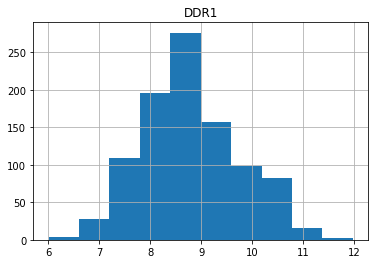

In [21]:
pd.DataFrame(X_train_trans['DDR1']).hist()
